In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('brisbane_water_quality.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

In [4]:
df.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


In [5]:
enc = LabelEncoder()

In [6]:
df['Timestamp']= enc.fit_transform(df['Timestamp'])

In [7]:
df.isnull().sum()

Timestamp                                      0
Record number                                  0
Average Water Speed                           20
Average Water Direction                        1
Chlorophyll                                  585
Chlorophyll [quality]                        808
Temperature                                 5164
Temperature [quality]                       5344
Dissolved Oxygen                            4300
Dissolved Oxygen [quality]                  4524
Dissolved Oxygen (%Saturation)              5749
Dissolved Oxygen (%Saturation) [quality]    5950
pH                                          1084
pH [quality]                                1308
Salinity                                    3958
Salinity [quality]                          4182
Specific Conductance                        1367
Specific Conductance [quality]              1591
Turbidity                                   2000
Turbidity [quality]                         2224
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

Timestamp                                   0
Record number                               0
Average Water Speed                         0
Average Water Direction                     0
Chlorophyll                                 0
Chlorophyll [quality]                       0
Temperature                                 0
Temperature [quality]                       0
Dissolved Oxygen                            0
Dissolved Oxygen [quality]                  0
Dissolved Oxygen (%Saturation)              0
Dissolved Oxygen (%Saturation) [quality]    0
pH                                          0
pH [quality]                                0
Salinity                                    0
Salinity [quality]                          0
Specific Conductance                        0
Specific Conductance [quality]              0
Turbidity                                   0
Turbidity [quality]                         0
dtype: int64

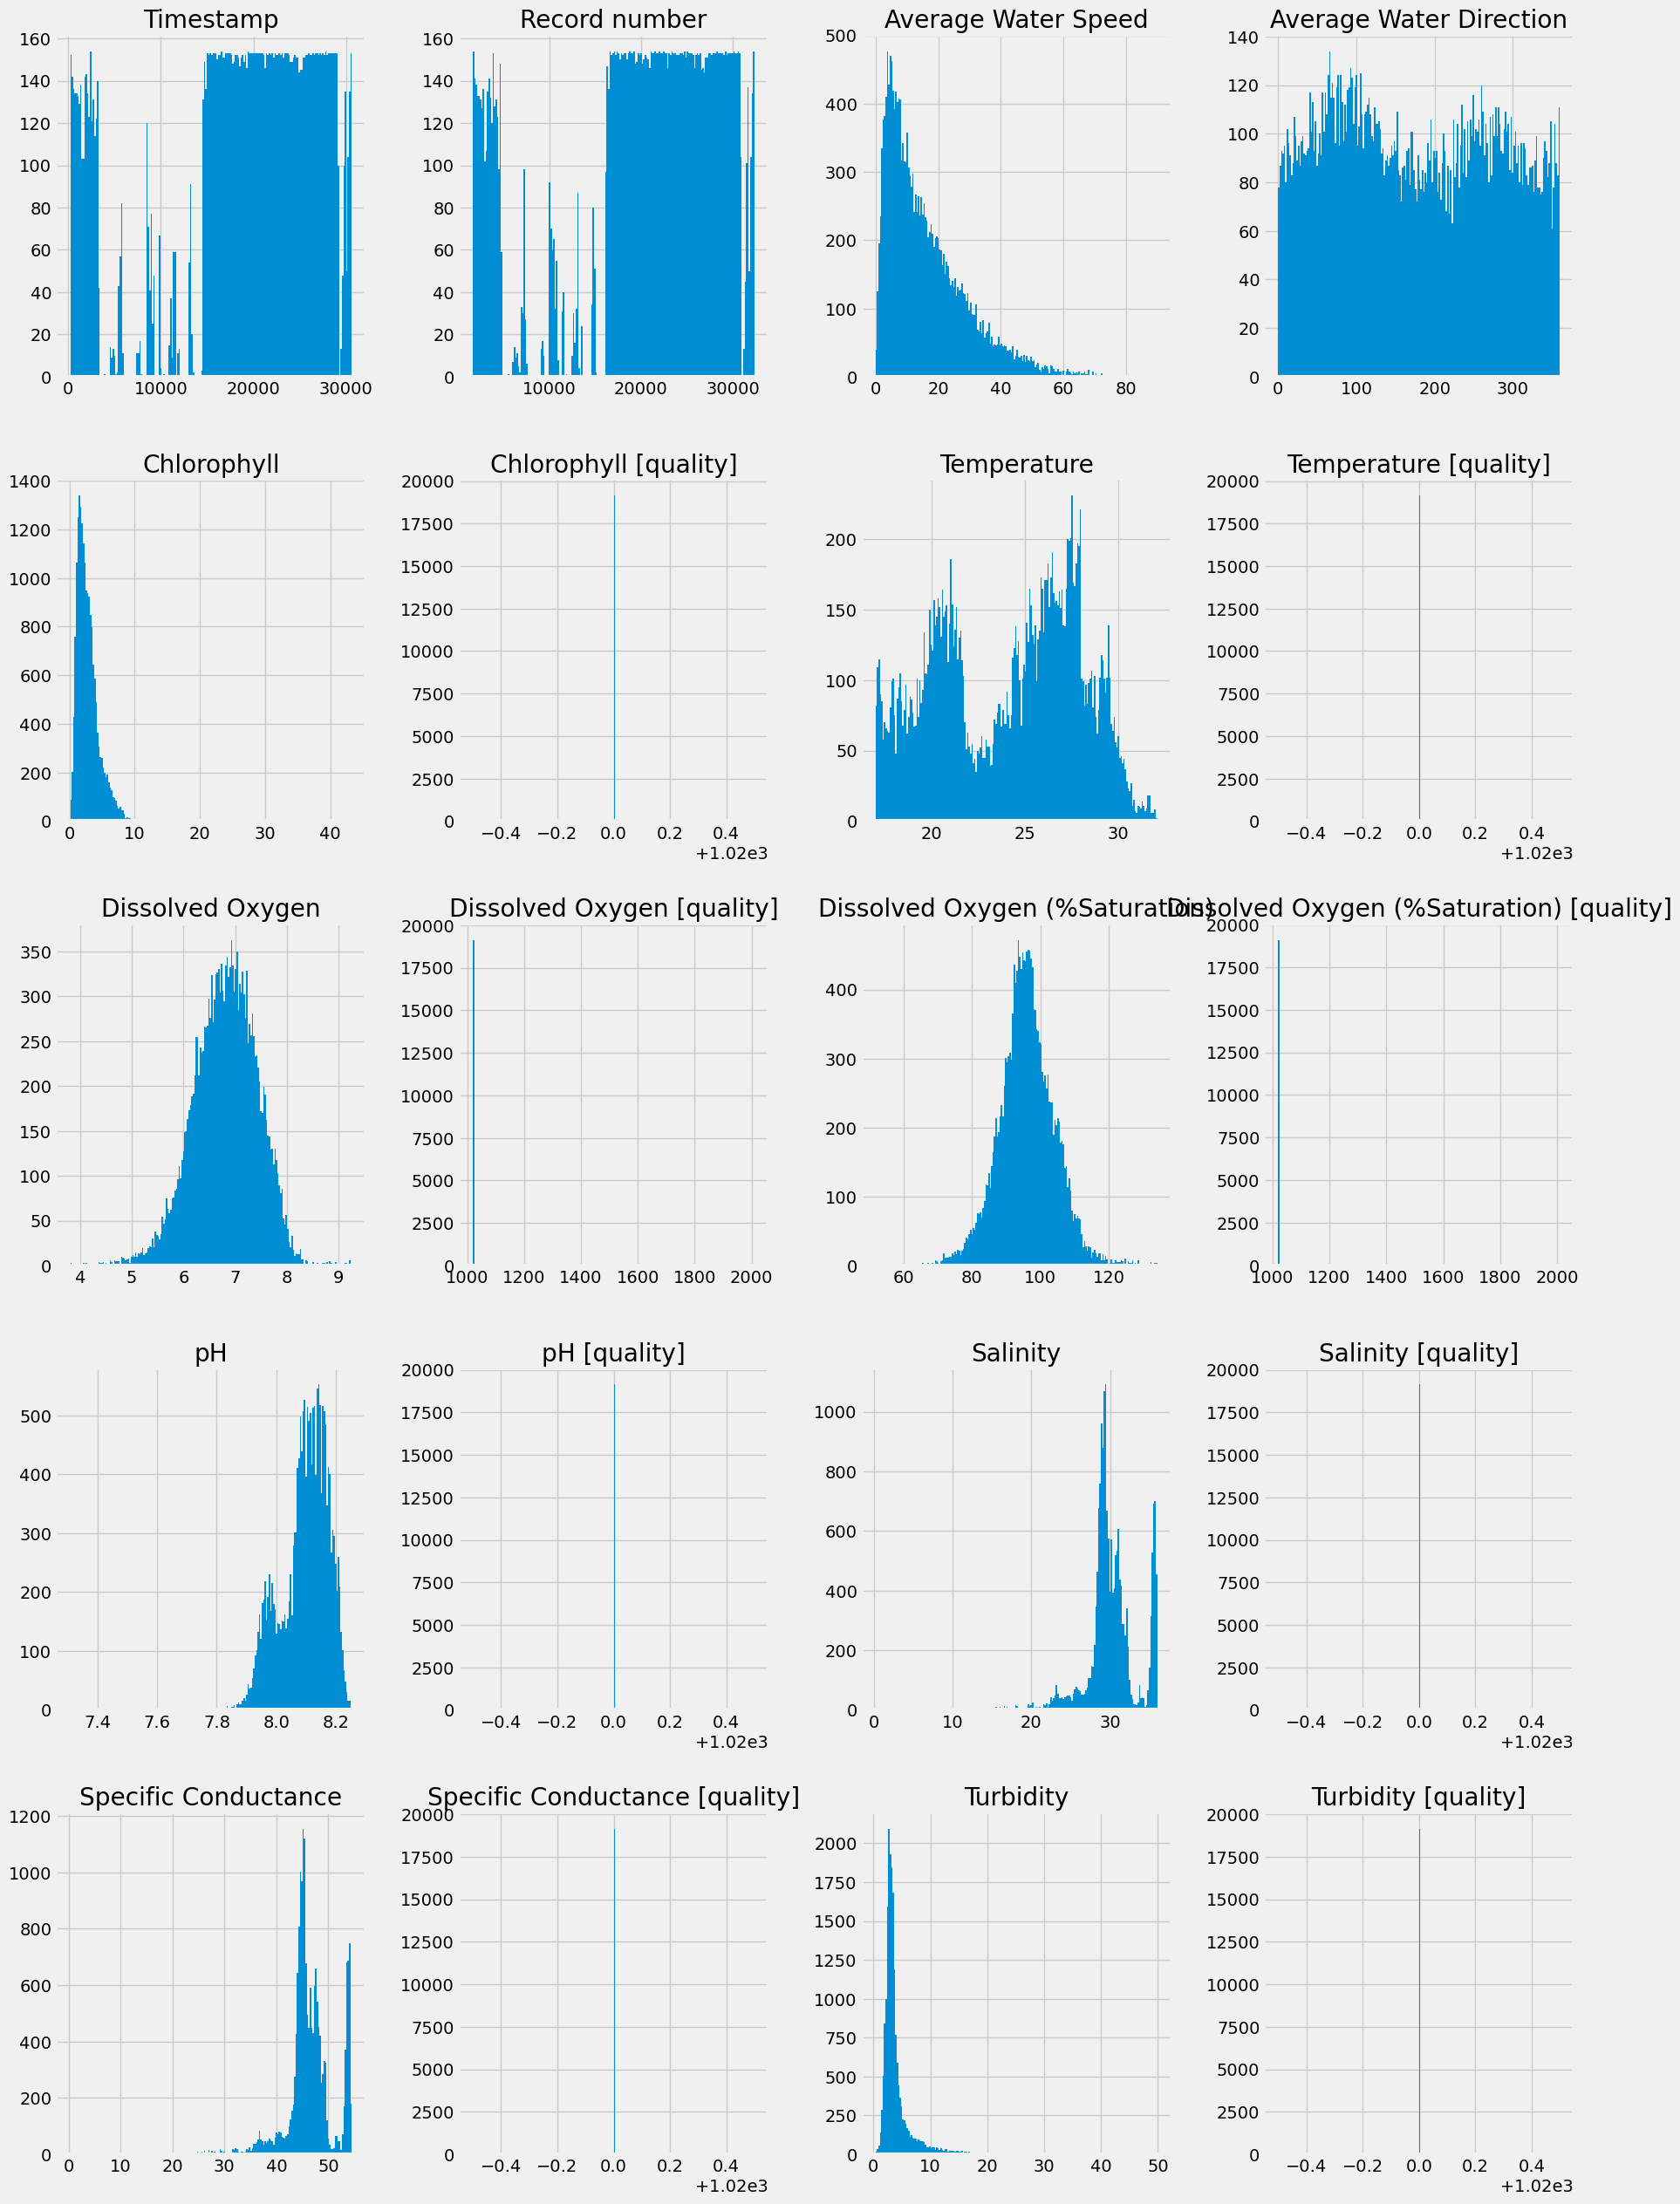

In [10]:
df.hist(bins = 200 ,figsize = (20,30))
plt.show()

In [11]:
multi_impute_df = df.copy()

In [12]:
new_df = multi_impute_df.copy()

In [13]:

def IQR(column_name):
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    values_upper = new_df[new_df[column_name] > upper_limit]
    values_lower = new_df[new_df[column_name] < lower_limit]
    
    return values_upper, values_lower, upper_limit, lower_limit

# this function will delete any outliers upper or lower the limit
def outliers_del(column_name):
    # we will make new_df global to consider the global variable not the local
    global new_df
    new_df = new_df[new_df[column_name] < upper_limit]
    new_df = new_df[new_df[column_name] > lower_limit]
    print("the old data shape is :", df.shape)
    print("the new data shape is :", new_df.shape)
    
    
def upper(column_name):
    if values_upper.shape[0] > 0:
        print("Outliers upper than the higher limit: ")
        return new_df[new_df[column_name] > upper_limit]
    else:
        print("There are no values higher than the upper limit!")
        
        
        
def lower(column_name):
    if values_lower.shape[0] > 0:
        print("Outliers lower than the higher limit: ")
        return new_df[new_df[column_name] < lower_limit]
    else:
        print("There are no values lower than the lower limit!")
        
        
def outlier_compare(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    sns.boxplot(x=new_df[column_name])
    plt.subplot(2,2,2)
    sns.boxplot(x=df[column_name])
    plt.show()

    

the old data shape is : (19149, 20)
the new data shape is : (14210, 20)


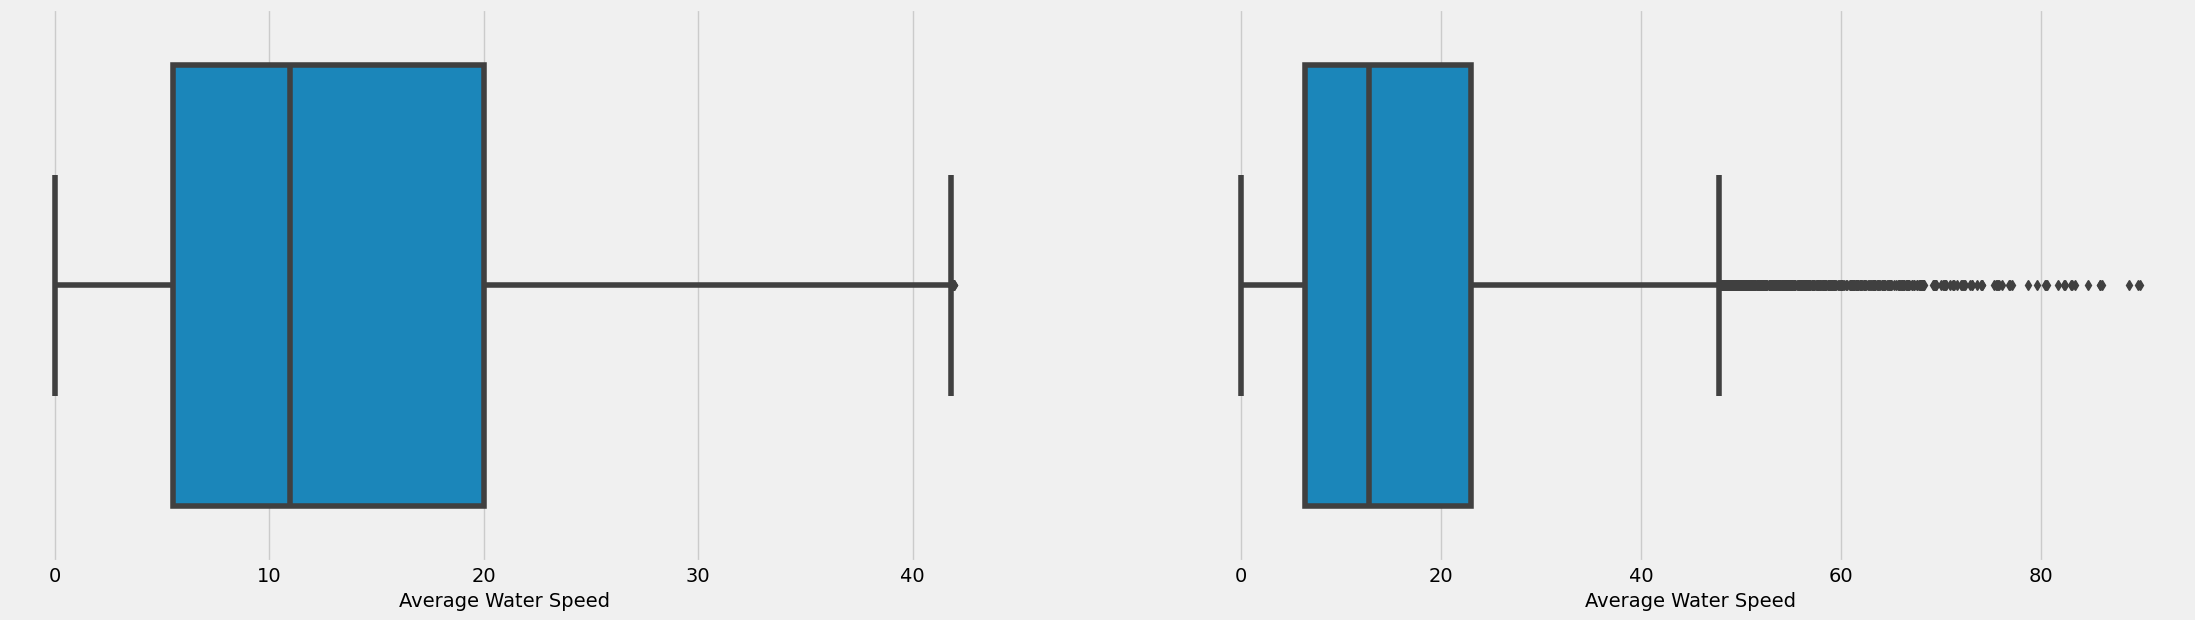

In [48]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Average Water Speed')
outliers_del('Average Water Speed')
outlier_compare('Average Water Speed')

the old data shape is : (19149, 20)
the new data shape is : (14156, 20)


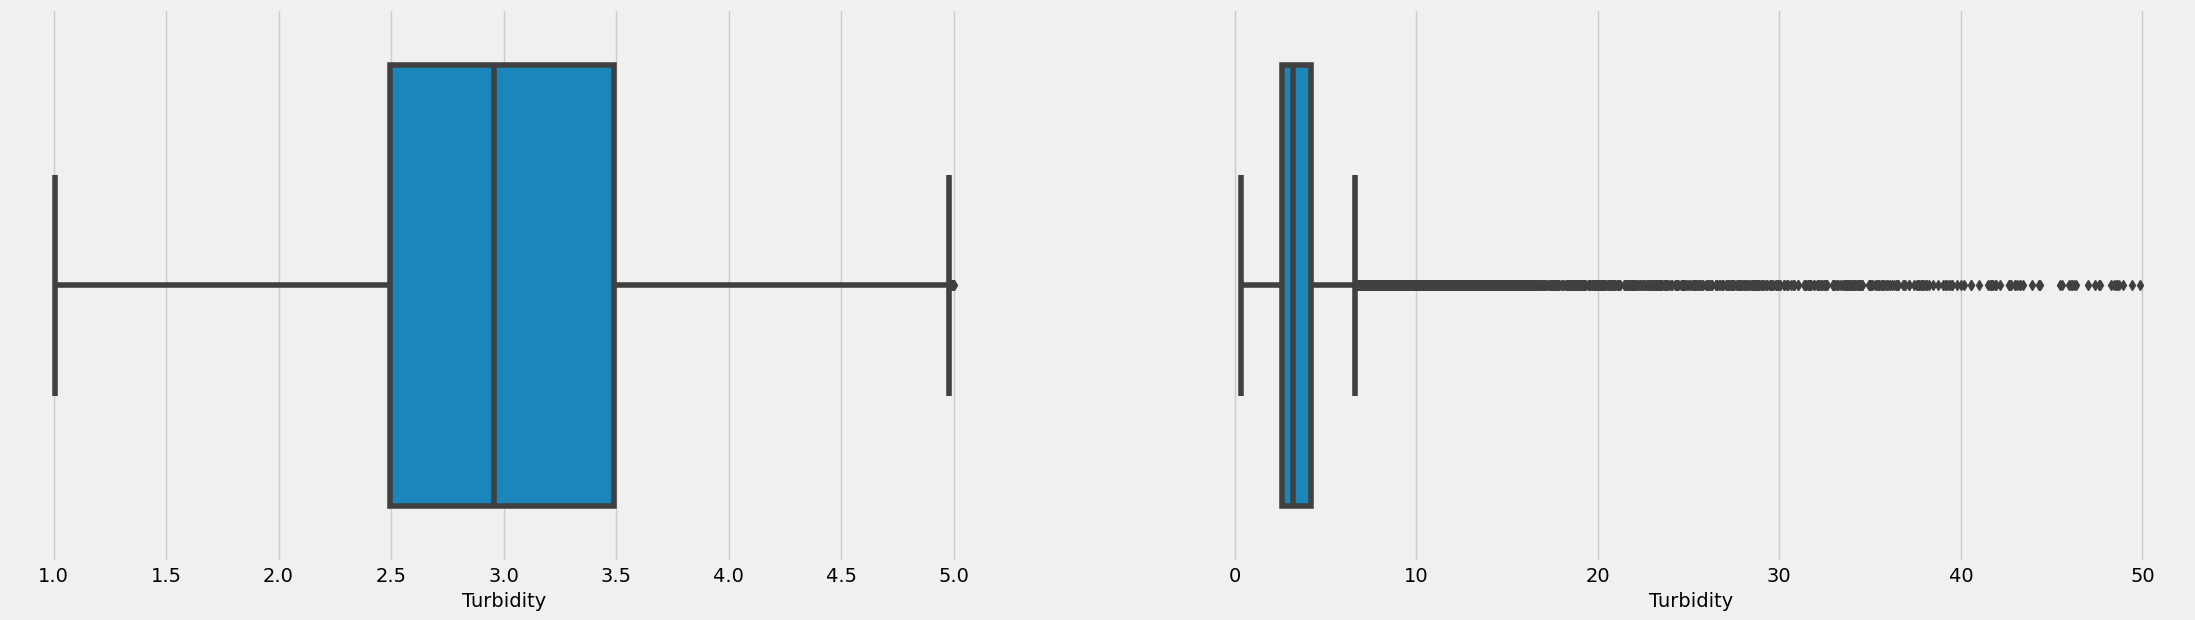

In [49]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Turbidity')
outliers_del('Turbidity')
outlier_compare('Turbidity')

the old data shape is : (19149, 20)
the new data shape is : (14142, 20)


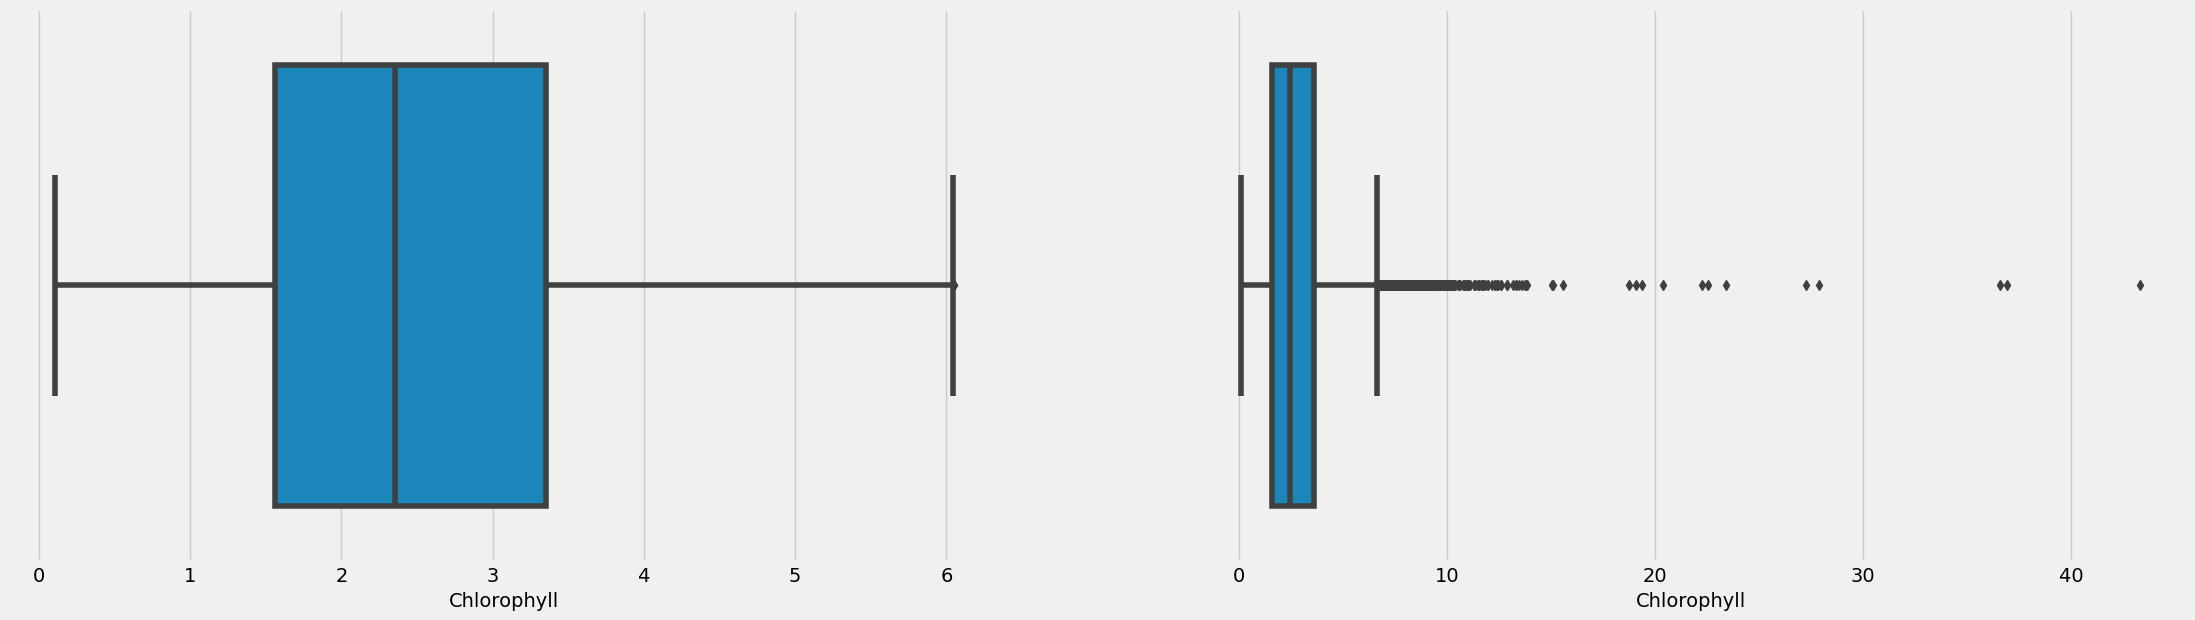

In [50]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Chlorophyll')
outliers_del('Chlorophyll')
outlier_compare('Chlorophyll')

In [17]:
df.fillna('missing')

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
225,220,1693,5.314,50.605,1.557,1020.0,19.346,1020.0,7.885,1020.0,105.210,1020.0,8.169,1020.0,34.809,1020.0,52.714,1020.0,2.085,1020.0
226,221,1694,5.088,34.550,1.299,1020.0,19.404,1020.0,7.804,1020.0,104.222,1020.0,8.162,1020.0,34.776,1020.0,52.668,1020.0,2.296,1020.0
227,222,1695,5.836,154.556,2.182,1020.0,19.443,1020.0,7.930,1020.0,106.005,1020.0,8.169,1020.0,34.822,1020.0,52.730,1020.0,2.081,1020.0
228,223,1696,1.530,17.843,2.112,1020.0,19.549,1020.0,7.912,1020.0,105.963,1020.0,8.165,1020.0,34.808,1020.0,52.712,1020.0,2.291,1020.0
229,224,1697,6.343,78.149,2.539,1020.0,19.591,1020.0,8.113,1020.0,108.773,1020.0,8.178,1020.0,34.850,1020.0,52.769,1020.0,2.014,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30889,30609,32357,13.314,82.720,0.944,1020.0,18.607,1020.0,6.876,1020.0,87.556,1020.0,8.151,1020.0,29.268,1020.0,45.134,1020.0,3.963,1020.0
30890,30610,32358,32.617,18.081,1.161,1020.0,18.551,1020.0,6.918,1020.0,87.987,1020.0,8.163,1020.0,29.254,1020.0,45.115,1020.0,3.928,1020.0
30891,30611,32359,8.552,306.184,1.192,1020.0,18.558,1020.0,6.651,1020.0,84.606,1020.0,8.145,1020.0,29.250,1020.0,45.110,1020.0,4.097,1020.0
30892,30612,32360,10.341,24.711,1.031,1020.0,18.547,1020.0,6.740,1020.0,85.713,1020.0,8.154,1020.0,29.247,1020.0,45.105,1020.0,4.962,1020.0


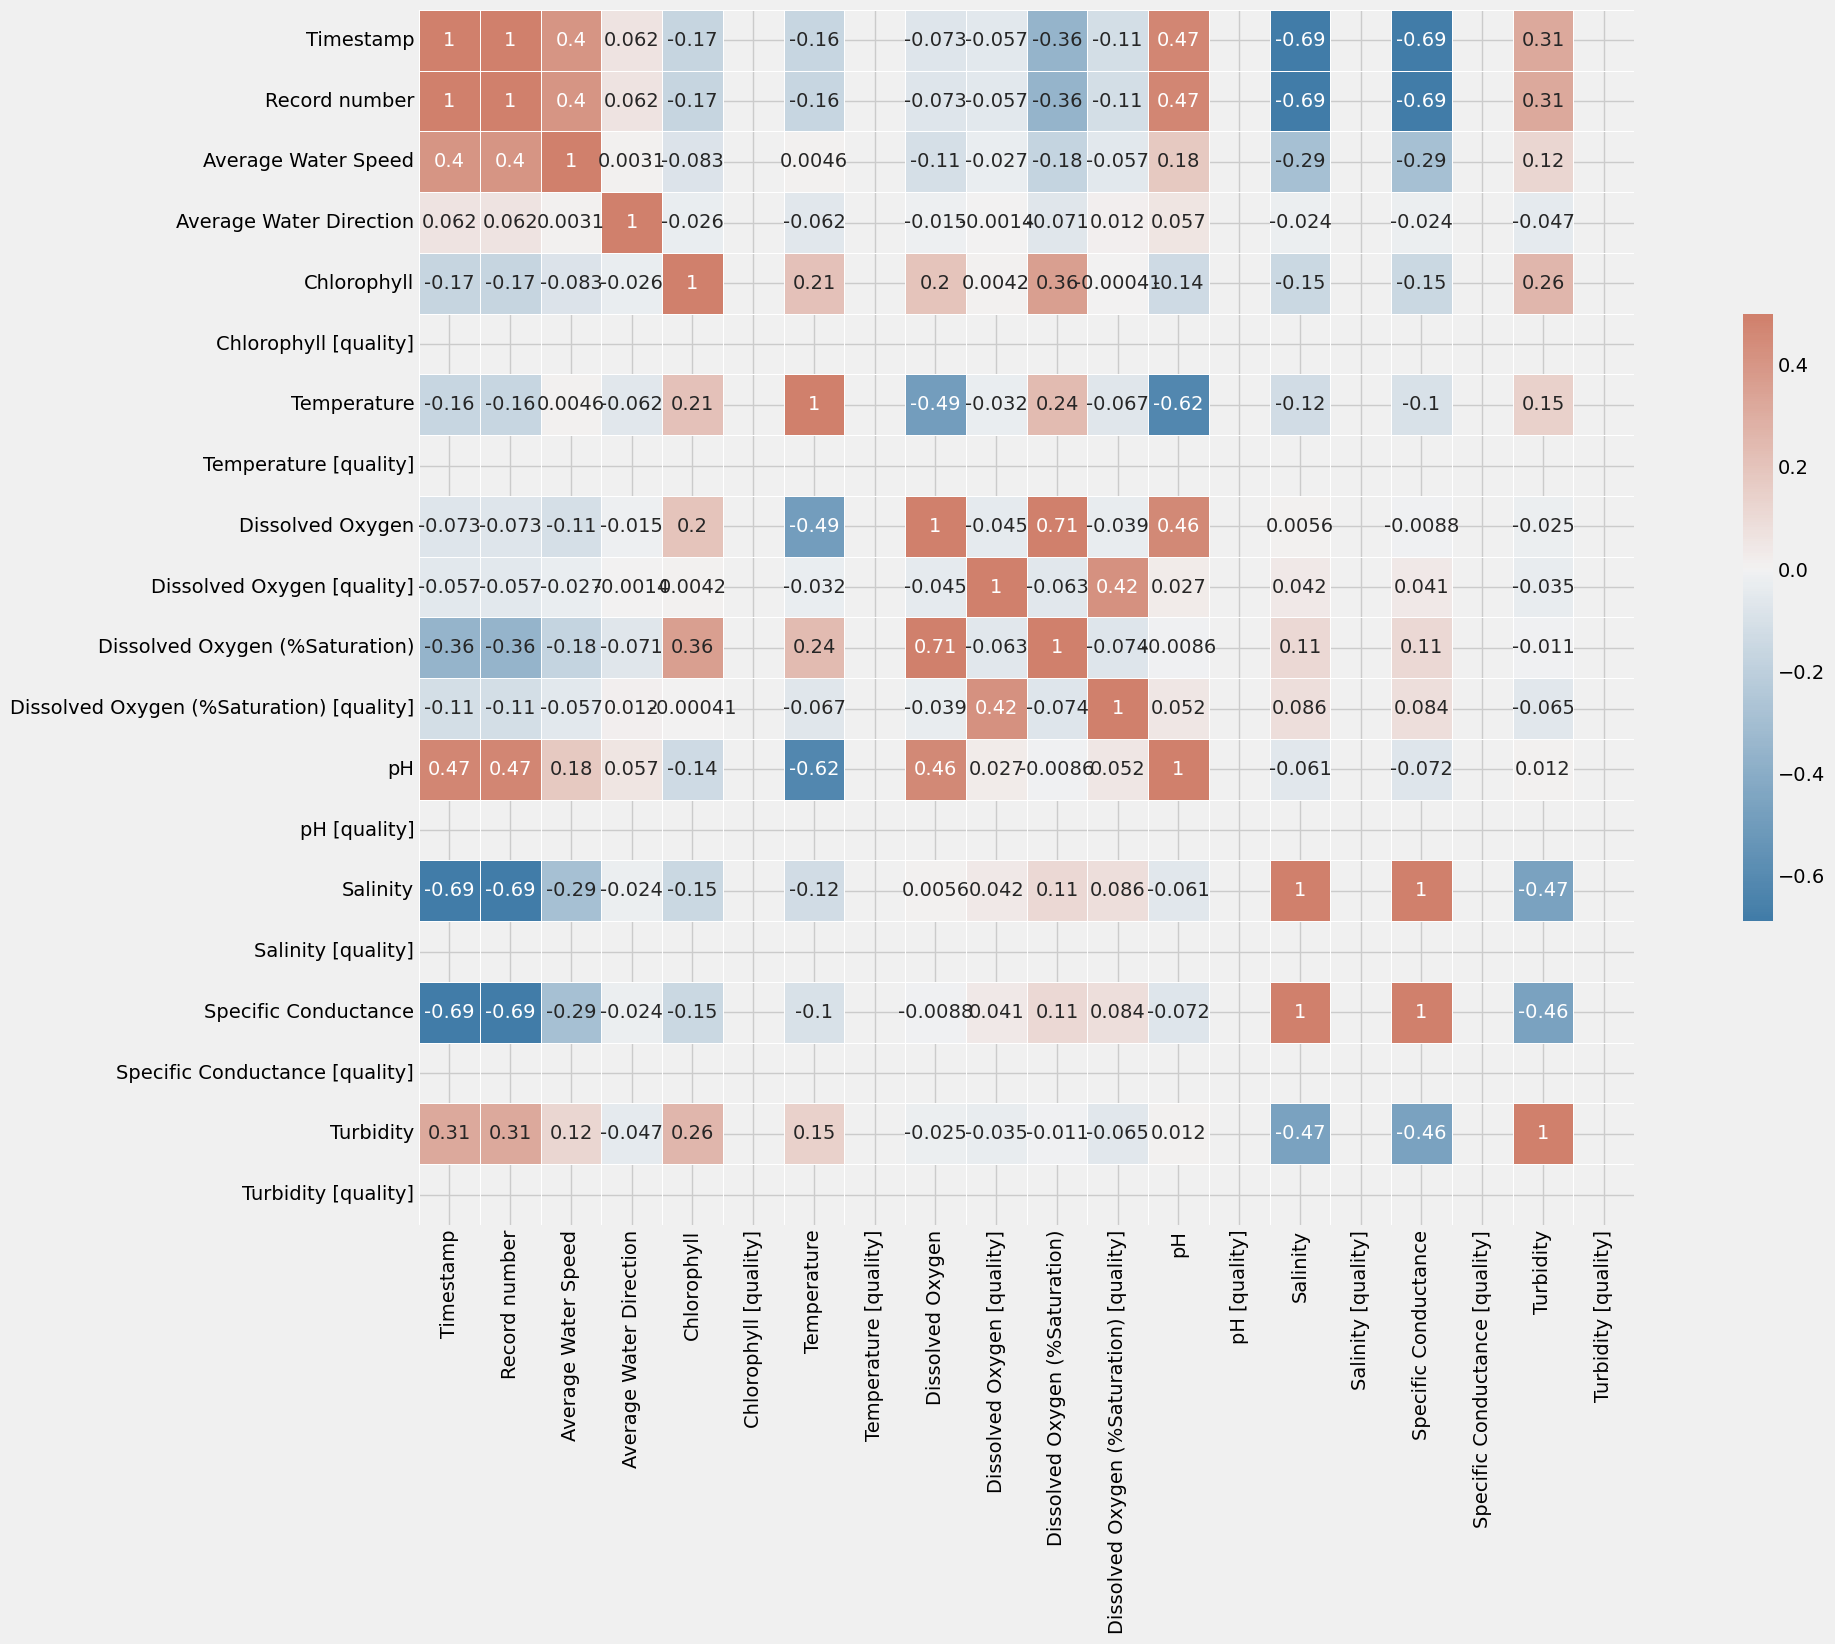

In [18]:
corr_matrix = new_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(240, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.5, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [19]:
x = df.drop("Salinity" , axis = 1)
y = df['Salinity']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr.score(x_train,y_train)

0.9996989119492373

In [24]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [25]:
normalizer = MinMaxScaler(feature_range=(0,1))
data = normalizer.fit_transform(new_df)
scaled_df = pd.DataFrame(data, columns=new_df.columns)
scaled_df.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,0.000000,0.000000,0.110879,0.140524,0.226259,0.0,0.155746,0.0,0.807403,0.0,0.652893,0.0,0.829522,0.0,0.937074,0.0,0.932776,0.0,0.278994,0.0
1,0.000033,0.000033,0.106149,0.095924,0.186028,0.0,0.159596,0.0,0.791370,0.0,0.640807,0.0,0.814969,0.0,0.935330,0.0,0.931050,0.0,0.313220,0.0
2,0.000066,0.000065,0.121803,0.429298,0.323717,0.0,0.162185,0.0,0.816310,0.0,0.662618,0.0,0.829522,0.0,0.937761,0.0,0.933376,0.0,0.278345,0.0
3,0.000099,0.000098,0.031686,0.049512,0.312802,0.0,0.169223,0.0,0.812747,0.0,0.662104,0.0,0.821206,0.0,0.937021,0.0,0.932701,0.0,0.312409,0.0
4,0.000132,0.000130,0.132414,0.217041,0.379386,0.0,0.172011,0.0,0.852534,0.0,0.696477,0.0,0.848233,0.0,0.939240,0.0,0.934839,0.0,0.267478,0.0


In [26]:
x_scaled = scaled_df.drop('Salinity' , axis = 1)
y_scaled = scaled_df['Salinity']
x_scaled_train,x_scaled_test,y_scaled_train,y_scaled_test = train_test_split(x,y)

In [27]:
ols = LinearRegression()
ols.fit(x_scaled_train,y_scaled_train)
ols.score(x_scaled_train,y_scaled_train)

0.9997137553845867

In [28]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [29]:
knn.score(x_train, y_train)

0.9639673016172201

In [30]:
knn.score(x_test, y_test)

0.9517702790059059

In [31]:
y_pred = knn.predict(x_test) 

In [32]:
mean_squared_error(y_test,y_pred)

0.5331291593683283

In [33]:
mean_absolute_error(y_test,y_pred)

0.31045892509050405

In [34]:
r2_score(y_test,y_pred)

0.9517702790059059

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_scaled_train, y_scaled_train)
knn.score(x_scaled_train, y_scaled_train)

0.9661126809407876

In [36]:
knn.score(x_scaled_test, y_scaled_test)

0.9564914673565742

In [37]:
y_pred = knn.predict(x_scaled_test)
mean_squared_error(y_scaled_test, y_pred)

0.5372287635004177

In [38]:
mean_absolute_error(y_scaled_test, y_pred)

0.30674273182957384

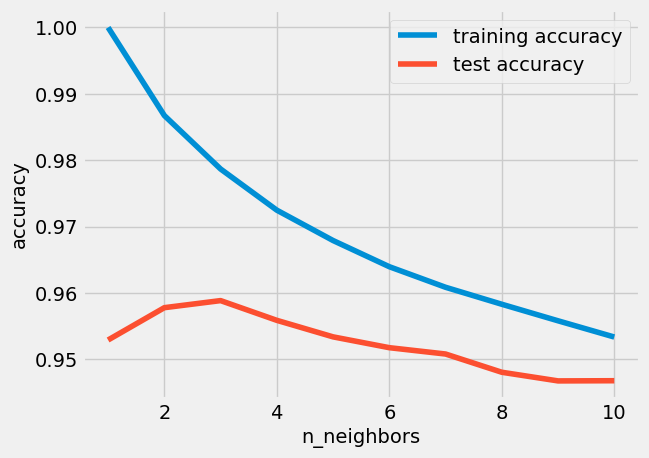

In [39]:
training_accuracy  = []
test_accuracy = []
neighbors_settings  = range(1,11)
for i in neighbors_settings:
    clf= KNeighborsRegressor(n_neighbors = i)
    clf.fit(x_train,y_train)
    
    training_accuracy.append (clf.score(x_train , y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))
    

plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings,test_accuracy,label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [40]:
x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Salinity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.134e+06
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:41:34   Log-Likelihood:                 27380.
No. Observations:               19149   AIC:                        -5.473e+04
Df Residuals:                   19135   BIC:                        -5.462e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Timestamp                                    0.0013   7.21e-05     17.366      0.000       0.001       0.001
Record number                               -0.0012   7.14e-05    -17.497      0.000      -0.001      -0.001
Average Water Speed                          0.0001   3.57e-05      3.686      0.000    6.16e-05       0.000
Average Water Direction                   4.178e-06   4.07e-06      1.027      0.304   -3.79e-06    1.21e-05
Chlorophyll                                  0.0006      0.000      2.198      0.028    6.37e-05       0.001
Chlorophyll [quality]                     8.287e-05   2.71e-05      3.052      0.002    2.97e-05       0.000
Temperature                                 -0.0177      0.001    -13.366      0.000      -0.020      -0.015
Temperature [quality]                     8.287e-05   2.71e-05      3.052      0.002    2.97e-05       0.000
Dissolved Oxygen                             0.0163      0.011      1.451      0.147      -0.006       0.038
Dissolved Oxygen [quality]               -6.939e-06   1.79e-05     -0.387      0.698    -4.2e-05    2.82e-05
Dissolved Oxygen (%Saturation)              -0.0012      0.001     -1.578      0.115      -0.003       0.000
Dissolved Oxygen (%Saturation) [quality]  -5.24e-05   9.05e-06     -5.788      0.000   -7.01e-05   -3.47e-05
pH                                          -0.0866      0.011     -8.243      0.000      -0.107      -0.066
pH [quality]                              8.287e-05   2.71e-05      3.052      0.002    2.97e-05       0.000
Salinity [quality]                        8.287e-05   2.71e-05      3.052      0.002    2.97e-05       0.000
Specific Conductance                         0.7080      0.000   2179.249      0.000       0.707       0.709
Specific Conductance [quality]            8.287e-05   2.71e-05      3.052      0.002    2.97e-05       0.000
Turbidity                                    0.0015   9.16e-05     16.553      0.000       0.001       0.002
Turbidity [quality]                       8.287e-05   2.71e-05      3.052      0.002    2.97e-05       0.000
==============================================================================
Omnibus:                    31156.882   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84138891.146
Skew:                          10.214   Prob(JB):                         0.00
Kurtosis:                     327.093   Cond. No.                     9.34e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-53. This might indicate that there are
strong multicollinearity problems or 

In [41]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor 

vif_data = pd.DataFrame()
vif_data['feature']=x.columns

vif_data['vif'] =[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\POP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif
0,Timestamp,2.140065e+06
1,Record number,2.137724e+06
2,Average Water Speed,1.234875e+00
3,Average Water Direction,1.011884e+00
4,Chlorophyll,1.339485e+00
5,Chlorophyll [quality],0.000000e+00
6,Temperature,1.418729e+02
7,Temperature [quality],0.000000e+00
8,Dissolved Oxygen,2.864364e+02
9,Dissolved Oxygen [quality],1.216766e+00
